In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading Data

data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
data.describe() 

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
# Checking for Duplicates

data[data.duplicated()]

,Delivery Time,Sorting Time


In [7]:
# No Duplicates

data[data.duplicated()].shape[0]

0

<Axes: >

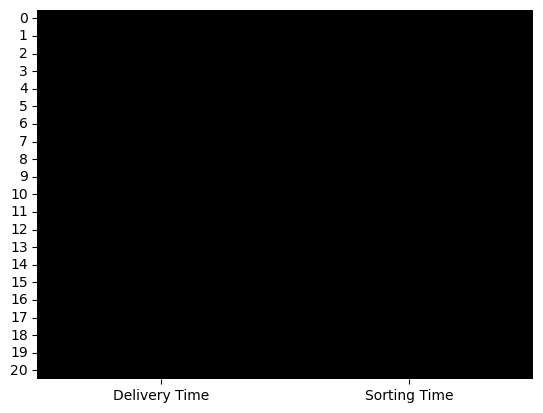

In [8]:
# Checking for missing values & imputation through visualisation

import seaborn as sns
cols = data.columns 
colours = ['black', 'yellow'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), cbar = False)

# No Null Values

<Axes: >

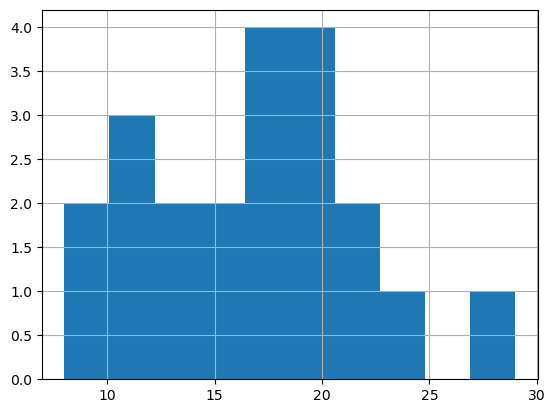

In [10]:
# Checking for Outliers

data["Delivery Time"].hist()

<Axes: >

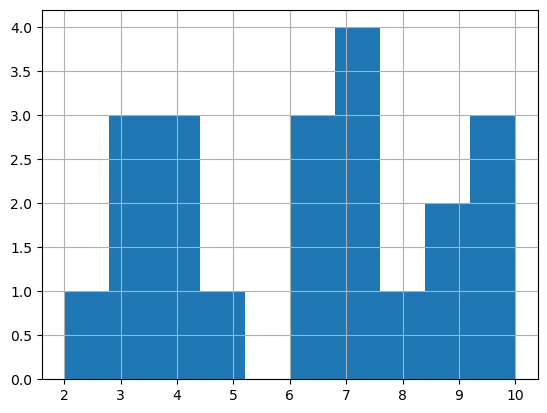

In [11]:
data["Sorting Time"].hist()

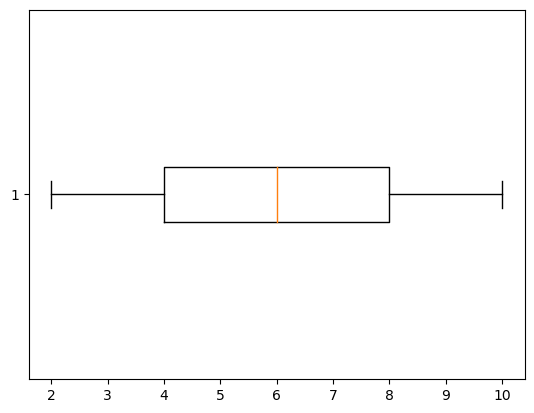

In [14]:
box = plt.boxplot(data["Sorting Time"],vert=False)

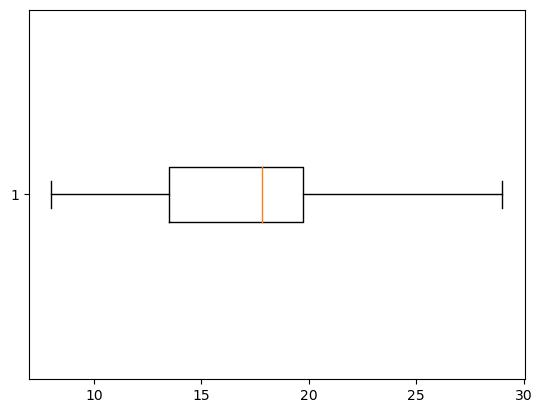

In [15]:
box = plt.boxplot(data["Delivery Time"],vert=False)

# No Outliers

### Simple Linear Regression Model

In [16]:
data["Sorting Time"].corr(data["Delivery Time"])

0.8259972607955325

In [17]:
data[["Sorting Time","Delivery Time"]].corr()

,Sorting Time,Delivery Time
Sorting Time,1.000000,0.825997
Delivery Time,0.825997,1.000000


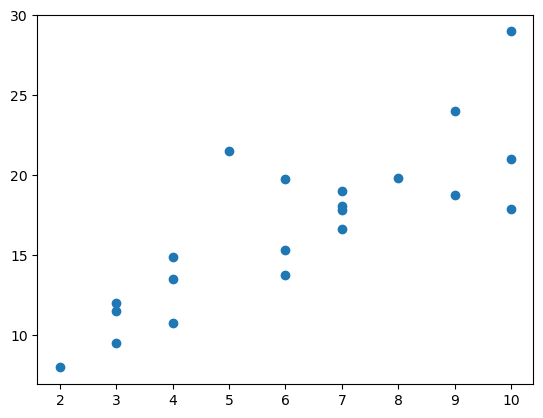

In [18]:
plt.scatter(data["Sorting Time"], data["Delivery Time"])

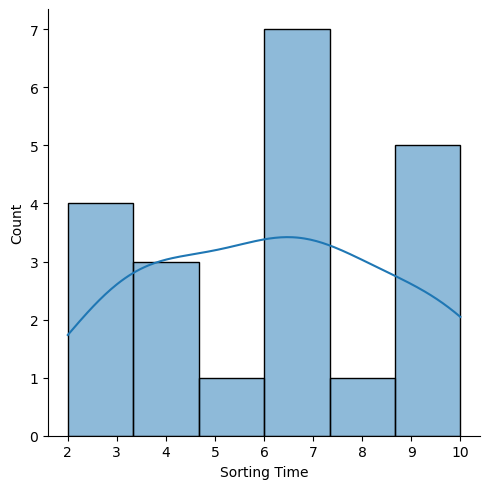

In [19]:
sns.displot(data["Sorting Time"],kde=True) 

C:\Users\vaibh\AppData\Local\Temp\ipykernel_112\802918568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Delivery Time"], kde = True)


<Axes: xlabel='Delivery Time', ylabel='Density'>

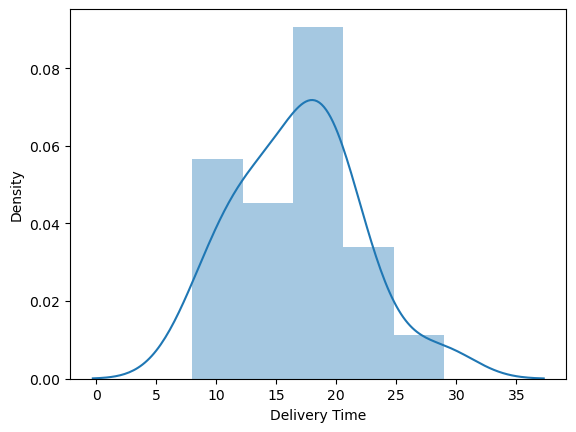

In [20]:
sns.distplot(data["Delivery Time"], kde = True)

In [22]:
# Renaming the Columns

data = data.rename({'Delivery Time': 'DeliveryTime'}, axis=1)

In [24]:
data = data.rename({'Sorting Time': 'SortingTime'}, axis=1)

In [25]:
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [26]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = data).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        20:49:50   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

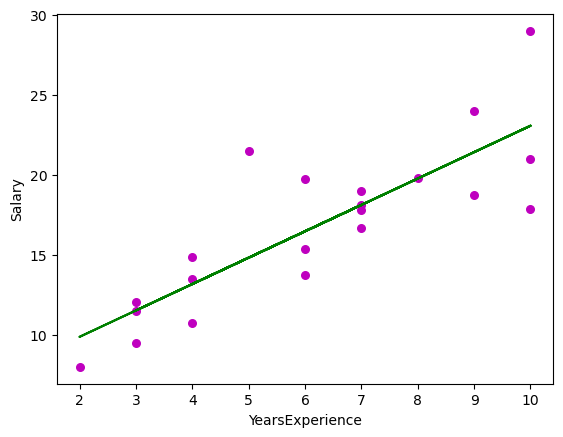

In [29]:
x = data["SortingTime"].values
y = data["DeliveryTime"].values
plt.scatter(x, y, color = "m", marker = "o", s = 30)
b0 = 6.582734
b1 = 1.649020 

# predicted response vector
y_hat = b0 + b1*x
 
# plotting the regression line
plt.plot(x, y_hat, color = "g")
  
# putting labels
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [30]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Prediction

In [31]:
pred = model.predict(data["SortingTime"])   # For given x value, these are y_hat values
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [32]:
data["Y_hat"] = pred

In [33]:
data

,DeliveryTime,SortingTime,Y_hat
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [34]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [35]:
mean_absolute_percentage_error(data["SortingTime"],data["Y_hat"])

1.9557398585816048

In [36]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(data["DeliveryTime"],data["Y_hat"]))

2.7916503270617654

In [37]:
# Mean Squared Error

mean_squared_error(data["DeliveryTime"],pred)

7.793311548584063

In [38]:
# Predicting for new values

newdata=pd.Series([7,5,6,9,4,2,1,8])
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
data_pred

,SortingTime
0,7
1,5
2,6
3,9
4,4
5,2
6,1
7,8


In [39]:
model.predict(data_pred)

0    18.125873
1    14.827833
2    16.476853
3    21.423913
4    13.178814
5     9.880774
6     8.231754
7    19.774893
dtype: float64